# Vanilla Models

This notebook will run our baseline models to understand better our dataset and how the features and target variables behave when running different models. Our focus is to find baseline models that can improve the Precision without affecting Recall. To evaluate the models, we will use the metrics Precision, Accuracy, Recall, F1 Score, and Confusion Matrix.

## Read In Data

In [28]:
# Import Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sklearn Packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
set_config(print_changed_only=False)
from xgboost import XGBClassifier
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', 300)
% matplotlib inline

plt.style.use('seaborn')

In [2]:
# 
df = pd.read_csv('../Phase_3_Project/data.csv/fetal_health.csv')


## Data Cleaning

In [3]:
df.fetal_health = np.where(df.fetal_health > 1.0, 2.0, df.fetal_health)

## Train Test Split

<b>Objectives: </b>

- Assign our feature variables and target variable into the X and y variables. 
- Split our dataset using Sklearn Train Test Split. We will use the Sklearn default option and assign 75% to our train set and 25% to our test set.

In [4]:
# Assigning features variables (X) and target variable (y)
X = df.drop('fetal_health', axis=1)
y = df.fetal_health

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Checking if train test split ran correclty
for dataset in [y_train, y_test]:
    print(round(len(dataset)/len(y), 2))

0.75
0.25


Our train and test set were split correctly. 75% of the dataset was assigned to our train set, and 25% was assigned to our test set.

## Baseline Models

To better understand our dataset and how our features variables affect our target variable, we decided to run baseline models and find what approach we should take when tuning our models. None of the baseline models will have any kinds of hyperparameters tuning. We will use the default hyperparameters.

<b>Objectives:</b>
- Run a Logistic Regression, KNN, Decision Tree, and Random Forest model.
- Create a function to simplify our model evaluation.
- Evaluate each model using the Accuracy, Recall, F1 Score, and Precision metrics.
- Create confusion matrices for each model.

In [6]:
# Evaluation function

def evaluation(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_))    

### Logistic Regression

When trying to classify structured data, logistic regression models usually give a quick and reliable result. Thus, it will be our first baseline model.

In [7]:
# Baseline Logistic Regression Model

lr_baseline = LogisticRegression()

# Fitting and predicting
lr_baseline.fit(X_train, y_train)
y_pred_lr_baseline = lr_baseline.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_baseline)

Evaluation Metrics:
Accuracy: 0.8834586466165414
Recall: 0.9535452322738386
F1 Score: 0.9263657957244655
Precision: 0.9006928406466512

Confusion Matrix:
 TN,  FP, FN, TP
[390  19  43  80]


<b>Findings:</b>

As we can see, our baseline Logistic Regression model performed reasonably well, even without tuning. Our feature variables can train the model with fairly precision.

We will now test the same features and target variables using K-nearest neighbors, which classifies data points based on similarity.

### KNN

Next, we will run a K-Nearest Neighbors model. KNN is a simples model that stores and classifies all data points based on similarity measures (i.e., distance functions). Since it's an easy model to set up, we will run it and read the results to understand what the data tells us. We will have to scale our dataset for KNN before running it.

In [8]:
# Call and fit scaler 
scaler = StandardScaler()
scaler.fit(X_train)

# Scaling our dataset
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Baseline KNN Model
knn_baseline = KNeighborsClassifier()

# Fitting and predicting
knn_baseline.fit(X_train_scaled, y_train)
y_pred_knn_baseline = knn_baseline.predict(X_test_scaled)

# Evaluation metrics
evaluation(y_test, y_pred_knn_baseline)

Evaluation Metrics:
Accuracy: 0.9398496240601504
Recall: 0.9877750611246944
F1 Score: 0.961904761904762
Precision: 0.9373549883990719

Confusion Matrix:
 TN,  FP, FN, TP
[404   5  27  96]


<b>Findings:</b>

Our baseline KNN model performed better than our baseline Logistic Regression model in all the metrics that we are analyzing the model. Interestingly, the Recall metric had a performance of .99. This is very high. It means that our baseline model is capable of predicting true positives with high precision. For now, we will keep running baseline models to find what the dataset has to tell us.

### Decision Tree

One of our project's key questions is to find what metrics can predict which features have the highest coefficient in our model predictions. For this reason, we will run Decision Tree as well, since it has a better division of features to predict an outcome.

In [10]:
# Baseline Decision Tree Model
dt_baseline = DecisionTreeClassifier()

# Fitting and predicting
dt_baseline = dt_baseline.fit(X_train, y_train)
y_pred_dt_baseline = dt_baseline.predict(X_test)

# Evaluation metrics
evaluation(y_test, y_pred_dt_baseline)

Evaluation Metrics:
Accuracy: 0.9266917293233082
Recall: 0.9388753056234719
F1 Score: 0.9516728624535316
Precision: 0.964824120603015

Confusion Matrix:
 TN,  FP, FN, TP
[384  25  14 109]


<b>Findings:</b>

Decision Tree did not perform better than KNN for most of the metrics that we are using. However, it performed better for the precision metric, which is the metric that we are most concerned about. Thus, we will run a Random Forest model, which works as a collection of decision trees.

### Random Forest

After running a Decision Tree model, it makes sense to run a Random Forest model, an ensemble model that operates by constructing a multitude of decision trees at training time and outputting the class that is the average prediction for the individual trees.

In [11]:
# Baseline Random Forest Model
rfc_baseline = RandomForestClassifier()

# Fitting and predicting
rfc_baseline.fit(X_train, y_train)
y_pred_rfr_baseline = rfc_baseline.predict(X_test)

# Evaluation metrics
evaluation(y_test, y_pred_rfr_baseline)

Evaluation Metrics:
Accuracy: 0.9492481203007519
Recall: 0.9877750611246944
F1 Score: 0.9676646706586827
Precision: 0.9483568075117371

Confusion Matrix:
 TN,  FP, FN, TP
[404   5  22 101]


<b>Findings:</b>

Our baseline random forest model had an exciting performance. It outperformed the Decision Tree baseline model in almost every metric, except Precision, which slightly decreased. Compared to KNN, our best performing model so far, if we compare every metric, performs better for the metrics Accuracy, F1 Score, and Precision. It performed the same for the Recall metric.

### Baseline Models Evaluation

Accuracy, Recall, and F1 Score. Decision Tree had the best performance for the Precision metric. All of our models performed reasonably well. However, we have space for improvement in all of them. We will start improving some hyperparameters and check how they performed.

## Preprocessing Data

We have a class imbalance problem in our dataset. Thus, we will use Synthetic Minority Oversampling Technique (SMOTE), where the minority class is oversampled by producing synthetic examples to fix the class imbalance. We will then compare the results to our baseline models to check if the target variable is even.

In [12]:
# SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

# Checking if SMOTE was correctly fitted
for dataset in (y_train, y_train_smote):
    print (dataset.value_counts(normalize=True))

1.0    0.781681
2.0    0.218319
Name: fetal_health, dtype: float64
2.0    0.5
1.0    0.5
Name: fetal_health, dtype: float64


## Vanilla Models Tuning

We will now start improving our model using hyperparameters tuning without any feature engineering. We will tune all the baseline models changing some hyperparameters. Then, we will use GridSearchCV and XGBoost to find the best hyperparameters.

### Logistic Regression

We will start with the first baseline model that we ran: Logistic Regression using SMOTE. We want to see if SMOTE can help our model best predict our target variable. We will not tune any hyperparameter for the first model.

In [13]:
# Logistic Regression Model
lr = LogisticRegression()

# Fitting and predicting
lr.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_smote)

Evaluation Metrics:
Accuracy: 0.8364661654135338
Recall: 0.8386308068459658
F1 Score: 0.88745148771022
Precision: 0.9423076923076923

Confusion Matrix:
 TN,  FP, FN, TP
[343  66  21 102]


Compared to our model using SMOTE underperformed in almost every metric using SMOTE. However, the Precision metric did perform better. It's the primary metric that we are interested in. We can see that there the number of False Negatives was reduced.

Next, we will add a few hyperparameters individually and see if we can improve our model. Here, our approach will be trying random hyperparameters and check the results compared to the model without any parameters.

In [14]:
# Logistic Regression Model
lr = LogisticRegression(C=100, max_iter=200, class_weight='balanced')

# Fitting and predicting
lr.fit(X_train_smote, y_train_smote)
y_pred_lr_tuned = lr.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_lr_tuned)


Evaluation Metrics:
Accuracy: 0.8383458646616542
Recall: 0.8410757946210269
F1 Score: 0.8888888888888888
Precision: 0.9424657534246575

Confusion Matrix:
 TN,  FP, FN, TP
[344  65  21 102]


`C=100` improved the Precision metric. All the other metrics remained the same.

`fit_intercept=False` reduced all the metrics.

`max_inter=200` improved the Precision metric compared to the default `max_inter=100`

`class_weight='balanced'` improved all the metrics.

<b>Findings:</b>

Compared to our baseline model, the Logistic Regression model did not perform better. We were able to improve the model slightly using some random tuning. However, we don't think that Logistic Regression has the power that we need. Thus, we will use some more advanced algorithms.

### KNN

Following our order of baseline models, we will know use KNN models. We will first compare the result of our baseline model to a model after applying SMOTE. Then, we will use GridSearchCV to find the best hyperparameter tuning. For this model, we will scale the train set using SMOTE.

In [15]:
# KNN model using SMOTE
knn = KNeighborsClassifier()

# Fitting and predicting
knn.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn.predict(X_test_scaled)

# Evaluation metrics
evaluation(y_test, y_pred_knn_smote)

Evaluation Metrics:
Accuracy: 0.793233082706767
Recall: 0.9975550122249389
F1 Score: 0.8812095032397408
Precision: 0.7891682785299806

Confusion Matrix:
 TN,  FP, FN, TP
[408   1 109  14]


Our KNN model performed better than our baseline model in almost every metric, except Recall that had a small drop. We will now run a GridSearchCV to find the most relevant hyperparameters.

In [16]:
grid_params_knn = {
    'n_neighbors':list(range(1,10)),
    'weights':['uniform','distance'],
    'metric':['eucliean','manhattan','minkowski'],
    'leaf_size':list(range(1,101))
}

In [17]:
# Using GridSearchCV for a KNN model
gs_knn = GridSearchCV(knn,grid_params_knn,verbose=1,n_jobs=-1)

# Fitting and predicting
gs_knn.fit(X_train_smote, y_train_smote)
y_pred_gs_knn = gs_knn.predict(X_test_scaled)

# Evaluation metrics
evaluation(y_test, y_pred_gs_knn)
print_results(gs_knn)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 9376 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 13776 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 18976 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 24976 tasks      | elapsed:  2.0min


Evaluation Metrics:
Accuracy: 0.768796992481203
Recall: 1.0
F1 Score: 0.869287991498406
Precision: 0.768796992481203

Confusion Matrix:
 TN,  FP, FN, TP
[409   0 123   0]
Best Parameters: {'leaf_size': 8, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}



[Parallel(n_jobs=-1)]: Done 27000 out of 27000 | elapsed:  2.2min finished


KNN using GridSearchCV did not perform better than our baseline model using only SMOTE. The Recall metric increased to 1.0, which might be a sign of overfitting. The model is not capable of identify False Positives or True Positives.

### Decision Tree

Following our order of models, we will now try a Decision Tree model. On the baseline model, Decision Tree did not perform better in most of the metrics. However, it did perform better with the Precision metric, the focus of our project. We will run a model using only SMOTE and see the performance. We believe that Random Forest, since it's an ensemble model, will perform better than KNN. However, we want to know how the model performs without the imbalance classification problem.

In [18]:
# Decision Tree Model
tree = DecisionTreeClassifier()

# Fitting and predicting
tree.fit(X_train_smote, y_train_smote)
y_pred_tree = tree.predict(X_test)

# Evaluation metrics
evaluation(y_test, y_pred_tree)

Evaluation Metrics:
Accuracy: 0.9285714285714286
Recall: 0.9584352078239609
F1 Score: 0.9537712895377128
Precision: 0.9491525423728814

Confusion Matrix:
 TN,  FP, FN, TP
[392  17  21 102]


<b>Findings:</b>

Our Decision Tree model had a good performance. So far, it was our best performing model for precision metric. We expect to improve this result using Random Forest models.


### Random Forest

Random Forest was our best performing baseline model. We will see if we can improve even more the results using hyperparameter tuning. However, let's first see how the model performs using only SMOTE first. Then we will use GridSearchCV to find the best hyperparameters.

In [19]:
# Random Forest Model
rfc = RandomForestClassifier()

# Fitting and predicting
rfc.fit(X_train_smote, y_train_smote)
y_preds_rfr = rfc.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_preds_rfr)

Evaluation Metrics:
Accuracy: 0.9586466165413534
Recall: 0.9877750611246944
F1 Score: 0.9734939759036144
Precision: 0.9596199524940617

Confusion Matrix:
 TN,  FP, FN, TP
[404   5  17 106]


<b>Findings: </b>

Compared to our baseline model, we can see improvements already in all the metrics. We can also see that our model reduced the number of False Positives, which is our focus.

### Random Forest with Grid Search

Now it's time to find the best hyperparameters for Random Forest, the model that interests us the most for now. First, we will set up a dictionary of hyperparameters that we want to try and then run a GridSearchCV to find the best fit for our model.

In [20]:
# GridSearch Parameters
parameters = {
    'n_estimators': [5, 50, 100, 150, 200],
    'max_depth': list(range(1, 11)),
    'criterion':['gini','entropy'],
    'max_features': list(range(20)),
    'oob_score':[False,True],
}

In [21]:
# # GridSearch (----------remove hyphen from GridSearchCV----------)
rfc_gs = GridSearchCV(rfc, parameters, cv=5, verbose=1, n_jobs=-1)

rfc_gs.fit(X_train_smote, y_train_smote)
y_preds_rfr_cv = rfc_gs.predict((X_test))

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2546 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 3296 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 5096 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6146 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 7296 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 8546 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 9896 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 11346 tasks      |

NameError: name 'y_preds_rfr_rfc_gs' is not defined

In [22]:
evaluation(y_test, y_preds_rfr_cv)
print_results(rfc_gs)

Evaluation Metrics:
Accuracy: 0.9548872180451128
Recall: 0.9755501222493888
F1 Score: 0.9708029197080292
Precision: 0.9661016949152542

Confusion Matrix:
 TN,  FP, FN, TP
[399  10  14 109]
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 10, 'n_estimators': 50, 'oob_score': False}



This is a great improvement from our baseline model. All the metrics improved and this is the best performing so far before feature engineering.

To confirm that this is the best performing model, we would like to play a little bit with the `max_feature` hyperparameter since we noticed that sometimes GridSearchCV might not choose the best one. 

In [23]:
# Baseline Random Forest Model
rfc = RandomForestClassifier(criterion='entropy',
                             n_estimators= 150, 
                             max_depth=9, 
                             max_features=10,
                             oob_score=True
                            )

# Fitting and predicting
rfc.fit(X_train_smote, y_train_smote)
y_preds_rfr_tuned = rfc.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_preds_rfr_tuned)

Evaluation Metrics:
Accuracy: 0.9605263157894737
Recall: 0.9755501222493888
F1 Score: 0.9743589743589743
Precision: 0.973170731707317

Confusion Matrix:
 TN,  FP, FN, TP
[399  10  11 112]


Text(0.5, 1.0, 'Feature Importance')

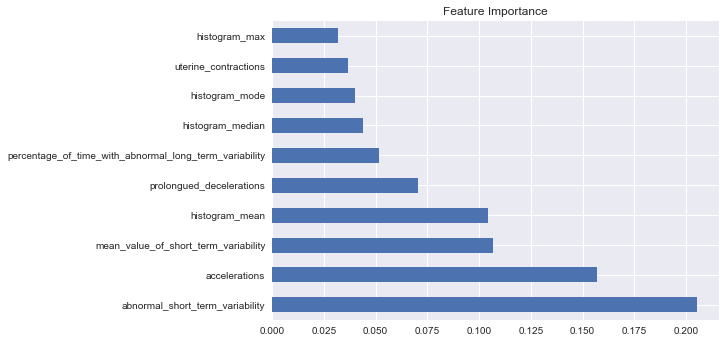

In [49]:
plt = pd.Series(rfc.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.set_title('Feature Importance')


<b>Findings:</b>

As we predicted, GridSearchCV didn't give us the best `max_features` for precision. We are not sure why this happens, so we always try changing it slightly to see what the result would look like. We changed `max_depth=10` to `max_depth=9` and the metric precision improved.

However, we are trying to decrease False Positives. GridSearchCV with Random Forest gave us the lowest False Positives.

Finally, we will use XGBoost to see if we can improve our Random Tree model.

### XGBoost

Finally, our last try to improve our model will be XGBoost, which uses Gradient Descent and Boosting principles. We believe there might have space for improvement. First, we will use the default hyperparameters. Then, we will use XGBoost with GridSearch.

In [25]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fitting and predicting
xgb.fit(X_train_smote, y_train_smote)
y_pred_xg = xgb.predict(X_test)

# Evaluation Metrics
evaluation(y_test, y_pred_xg)

Evaluation Metrics:
Accuracy: 0.943609022556391
Recall: 0.9657701711491442
F1 Score: 0.9634146341463415
Precision: 0.9610705596107056

Confusion Matrix:
 TN,  FP, FN, TP
[395  14  16 107]


<b>Findings:</b>

XGBoost performed using only the default parameters. It did not perform better than Random Forest using Grid Search.

In [30]:
#parameter grid for xgboost
param_dist = {'n_estimators': [500,1000,1500],
              'learning_rate': [0.1,0.07,0.05,0.03,0.01],
              'max_depth': [9,10,11,12,13],
              'colsample_bytree': [0.5,0.45,0.4],
              'min_child_weight': [1, 2, 3]
             }

In [32]:
#gridsearch for xgboost
grid_xg = GridSearchCV(estimator=xgb,
                      param_grid= param_dist,
                      scoring='f1',
                      n_jobs=-1,
                      verbose=1,
                      iid=False,
                      cv=10)

In [34]:
#fit grid search xgboost to train set
grid_xg.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 675 candidates, totalling 6750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 58.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 68.5min
[Parallel(n_jobs=-1)]: Done 6750 out of 6750 | elapsed: 77.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.45, 0.4],
                         'learning_rate': [0.1, 0.07, 0.05, 0.03, 0.01],
                         'max_depth': [9, 10, 11,

In [43]:
#xgboost best estimator test set predictions
y_pred = grid_xg.best_estimator_.predict(X_test)

In [36]:
evaluation(y_test,y_pred)

Evaluation Metrics:
Accuracy: 0.956766917293233
Recall: 0.9828850855745721
F1 Score: 0.9721886336154776
Precision: 0.9617224880382775

Confusion Matrix:
 TN,  FP, FN, TP
[402   7  16 107]


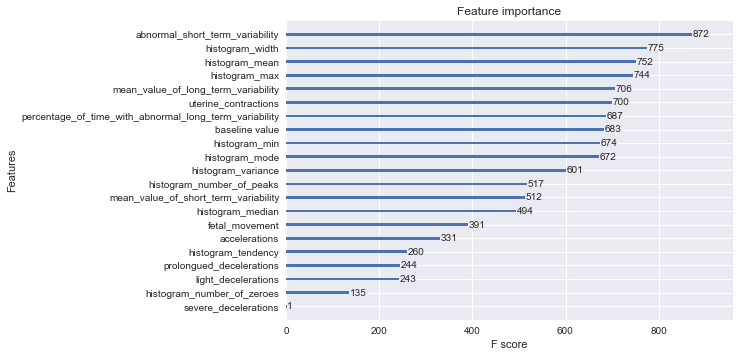

In [37]:
#plot feature importance of best estimator grid xgboost
plot_importance(grid_xg.best_estimator_)

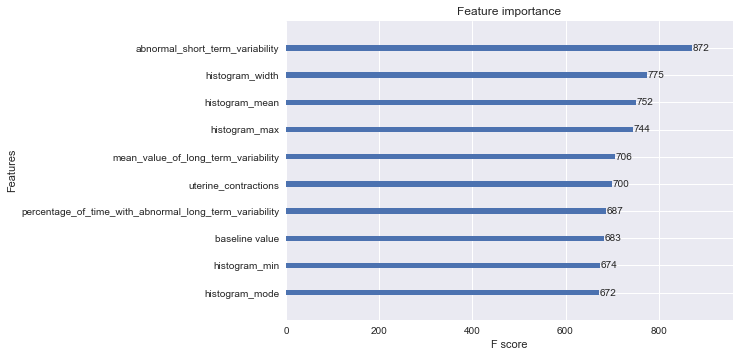

In [44]:
#plot top ten key features
plot_importance(grid_xg.best_estimator_,max_num_features=10)

## Vanilla modeling results
- For the vanilla dataset, the best model overall was our grid search best parameter random forest.  This model had the best precision score of any model we ran in this analysis. Key features for the vanilla model where abnormal_short term variatability, acceleration, mean abnormal short term varitability and histogram mean.

- for comparison to the experimental datset follow this link
[experimental modeling process](.experimental_feature_Modeling.ipynb)